# Inverse Compton scattering

### By: Pablo Sotomayor

---

Low-energy radiation can significantly boost its energy through inverse Compton scattering with relativistic electrons:

$$\gamma + e^- \rightarrow \gamma + e^-$$

In this notebook we consider as targets the photons of radiation fields generated by blackbodies. In particular, we restrict our study to monochromatic radiation.

In [1]:
# Getting libraries

import numpy as np
from scipy.special import kv
from scipy.integrate import simps
from math import pi, isclose, exp, log, log10
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Physical parameters
# Units: cgs

lightVelocity = 29979245800
thomsonCrossSection = 6.6524e-25
fineStructureConstant = 7.297352568e-3
electronMass = 9.1094e-28
protonMass = 1.6726e-24
elementalCharge = 4.8032e-10
erg2ev = 6.242e11
ev2erg = 1/erg2ev
solarMass = 1.989e33
solarRadius = 6.96e10
gravitationalConstant = 6.6743e-8
planckConstant = 6.6261e-27
boltzmannConstant = 1.3807e-16
barn2cm = 1e-24
pc2cm = 3.086e18
lightday2pc = lightVelocity*24*3600/pc2cm
yr2sec = 3.156e7
solarLuminosity = 3.839e33
astronomicalUnit = 1.496e13
stefanBoltzmannConstant = 5.6704e-5
deg2rad = pi/180
rad2deg = 1/deg2rad

### Blackbody radiation


Thermal radiation is electromagnetic radiation generated by matter in thermal equilibrium. Blackbody radiation is the thermal electromagnetic radiation within, or surrounding, a body in thermodynamic equilibrium with its environment. A blackbody is an ideal, emitting and absorbing perfect object.

For a body that emits thermal radiation:

$$S_{\nu} = B_{\nu}(\nu, T)$$

$$j_{\nu} = \kappa_{\nu} B_{\nu}(\nu, T)$$

and for a blackbody:

$$I_{\nu} = B_{\nu}(\nu, T)$$

where $S_{\nu}$ is the source function of the body, $j_{\nu}$ the emissivity coefficient, $I_{\nu}$ the specific (or monochromatic) intensity of the radiation field, and $B_{\nu}(T)$ the specific (or monochromatic) Planck function, which only depends on the temperature through:

$$B_{\nu}(\nu, T) = \frac{2h\nu^{3}}{c^2}\frac{1}{\exp\left(h\nu/\kappa_{\rm B}T \right) - 1}\qquad [{\rm erg\,cm^{-2}\,s^{-1}\,sr^{-1}\,Hz^{-1}}]$$

The Planck function per unit energy of the photons is calculated from:

$$B_{\rm \epsilon}{\rm d}\epsilon = B_{\nu}{\rm d}\nu$$

$$B_{\rm \epsilon}(\epsilon, T) = \frac{2 \epsilon^{3}}{c^2 h^{3}}\frac{1}{\exp\left(\epsilon/\kappa_{\rm B}T \right) - 1}\qquad [{\rm erg\,cm^{-2}\,s^{-1}\,sr^{-1}\,erg^{-1}}]$$

where $\epsilon = h\nu$. Planck's function takes its maximum value at $E \simeq 1.59 \kappa_{\rm B}T$. The specific energy density of the radiation field of a blackbody is given by

$$U_{\rm \epsilon}(\epsilon, T) = \frac{4\pi}{c}B_{\rm \epsilon}(\epsilon, T)$$

$$U_{\rm \epsilon}(\epsilon, T) = \frac{8\pi \epsilon^{3}}{c^3 h^{3}}\frac{1}{\exp\left(\epsilon/\kappa_{\rm B}T \right) - 1}\qquad [{\rm erg\,cm^{-3}\,erg^{-1}}]$$

this quantity is related to the specific number density of the radiation field as:

$$n_{\rm \epsilon}(\epsilon, T) = \frac{U_{\rm \epsilon}(\epsilon, T)}{\epsilon}$$

$$n_{\rm \epsilon}(\epsilon, T) = \frac{8\pi E^{2}}{c^3 h^{3}}\frac{1}{\exp\left(E/\kappa_{\rm B}T \right) - 1}\qquad [{\rm erg^{-1}\,cm^{-3}}]$$

Integrating the Planck function at all frequencies, the total energy density of the radiation field is obtained:

$$U_{\rm BB}(T) = \frac{4\pi}{c}B(T)$$

$$U_{\rm BB}(T) = a T^{4}$$

where $a = 8\pi^5 \kappa_{\rm B}^4 /15 c^3 h^3$, and $h$ the Planck constant.

In [3]:
#Function that returns the Planck distribution for a black body at temperature T

def blackBody(
    gasTemperature:float, 
    EphGrid:int=100,
    fraccEphmin:float=1e-8,
    fraccEphmax:float=1e2)->tuple:
    
    c = lightVelocity
    kb = boltzmannConstant
    hp = planckConstant
    T = gasTemperature
    Epeak = 1.59*kb*T
    Ephmin = fraccEphmin*Epeak
    Ephmax = fraccEphmax*Epeak
    arrEph = np.logspace(log10(Ephmin), log10(Ephmax), EphGrid)
    arrNph = 8*pi*arrEph**2 / ((np.exp(arrEph/kb/T)) - 1)/(hp*c)**3  
    Uph = 8*pi**5*(kb*T)**4/15/(c*hp)**3
    return arrEph, arrNph, Uph

**Example 1**: Plot the energy distribution for the cosmic microwave background ($T = 2.725\,{\rm K}$) and calculate its energy density (in units of ${\rm erg\,cm^{-3}}$).

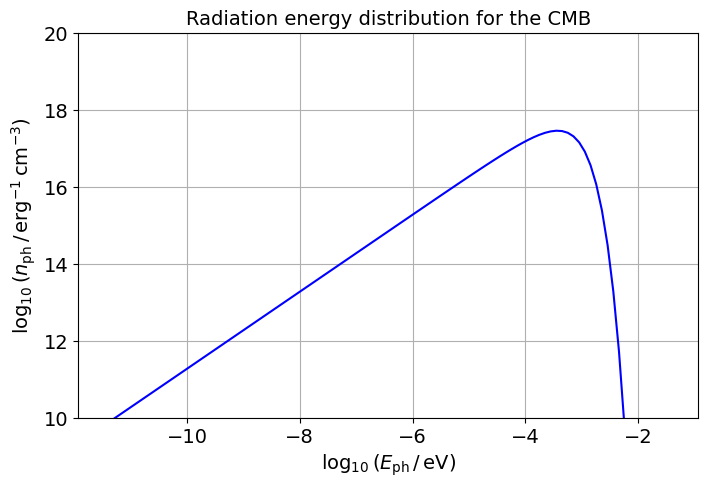

CMB energy density = 0.26 eV cm^-3


In [4]:
T = 2.725
arrEph, arrNph, Uph = blackBody(gasTemperature=T)

plt.figure(figsize=(8,5))
plt.plot(np.log10(arrEph*erg2ev), np.log10(arrNph), c='blue')
plt.xlabel(r"$\log_{10}(E_{\rm ph}\,/\,{\rm eV})$", fontsize=14)
plt.ylabel(r"$\log_{10}(n_{\rm ph}\,/\,{\rm erg^{-1}\,cm^{-3}})$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(10,20)
plt.title("Radiation energy distribution for the CMB", fontsize=14)
plt.grid()
plt.show()

print(f"CMB energy density = {Uph*erg2ev:0.2f} eV cm^{-3}")

To estimate the cooling rate of electrons by scattering photons through Compton inverse,, integrate over the entire energy range of the white photons, and the entire energy range of the scattered photons:

$$t_{\rm IC}^{-1} = \frac{1}{E} \int_{\epsilon_{\rm min}}^{\epsilon_{\rm max}} {\rm d}\epsilon \int_{\epsilon}^{E_{\gamma}^{\rm max}(\kappa)} {\rm d}E_{\gamma} (E_{\gamma} - \epsilon) P_{\rm IC}(E_{\gamma}, E, \epsilon)$$

A useful approximation to estimate the inverse Compton scattering cooling time when the targets are photons following a Planckian distribution with temperature $T$ is:

$$t_{IC}^{-1} = 5.5\times 10^{17}\;\tilde{T}^3\;\frac{\ln(1+0.55\gamma \tilde{T})}{1+25\tilde{T}\gamma}
\left(1+\frac{{1.4\gamma \tilde{T}}}{1+12\gamma^2\tilde{T}^2}\right)\,\frac{U}{U_\mathrm{BB}}\,{\rm s}^{-1},$$

where $\tilde{T}=kT/m_{\rm e}c^2$ (see Bosch-Ramon & Khangulyan 2009).


In [5]:
# Function that returns the physical parameters according to the type of particle

def mass(typeParticle):
    if typeParticle == 'electron':
        massParticle = electronMass
    elif typeParticle == 'proton':
        massParticle = protonMass    
    else:
        raise AttributeError('Unknown particle')
    return massParticle

def charge(typeParticle):
    chargeParticle = elementalCharge
    if typeParticle == 'neutron':
        return 0.
    return chargeParticle

def classicalRadius(typeParticle):
    q = charge(typeParticle)
    m = mass(typeParticle)
    c = lightVelocity
    return  q*q/m/c/c

def thomsonCrossSection(typeParticle):    
    return 8.*pi*(classicalRadius(typeParticle)**2)/3

def restEnergy(typeParticle):
    return mass(typeParticle)*c*c

In [6]:
# Function that returns the cooling timescale by inverse Compton scattering (Bosch-Ramon & Khangulyan 2009)

def comptonCoolingTime(
    gasTemperature:float,
    lorentzFactor:float,
    particle:str,
    radiationEnergyDensity:float=None)->float:
    
    kb = boltzmannConstant
    m = mass(particle)
    c = lightVelocity
    T = gasTemperature
    Tnorm = kb*T/m/c/c
    LF = lorentzFactor   
    time = 5.5e17*Tnorm**3 *LF*(np.log(1 + 0.55*LF*Tnorm))/(1 + 25*Tnorm*LF)
    Uph = blackBody(T)[2]
    if radiationEnergyDensity is not None:
        time *= (1 + 1.4*LF*Tnorm/(1 + 12*LF*LF*Tnorm*Tnorm))*(radiationEnergyDensity/Uph)**2
    else:
        time *= (1 + 1.4*LF*Tnorm/(1 + 12*LF*LF*Tnorm*Tnorm))    
    return LF/time

**Example 2**: Calculate the cooling timescale for electrons by inverse Compton scattering with photons from the CMB. Consider a logarithmic step grid for the electron energies, with minimum energy $E_{\rm min} = 1\,{\rm MeV}$ and maximum energy $E_{\rm min} = 1\,{\rm TeV}$. For the CMB assume monochromatic radiation. Plot the results.

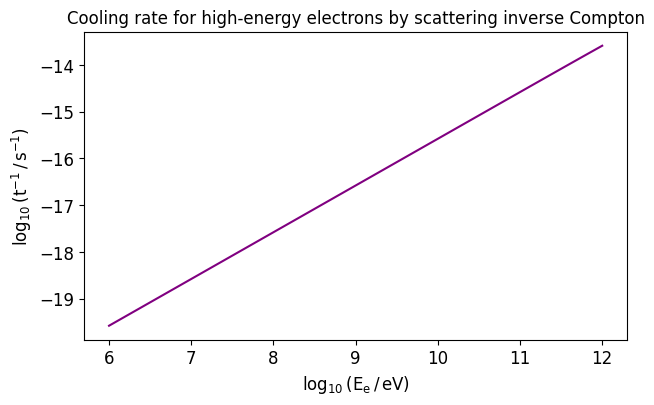

In [7]:
m = mass('electron')
c = lightVelocity
kb = boltzmannConstant

T = 2.725
Emin = 1e6 *ev2erg
Emax = 1e12 *ev2erg
EGrid = 100
arrE = np.logspace(np.log10(Emin), np.log10(Emax), EGrid)
Eph = 2.7*kb*T

arrTcomp = comptonCoolingTime(gasTemperature=T, lorentzFactor=arrE/m/c/c, particle='electron')

plt.figure(figsize=(7,4))
plt.plot(np.log10(arrE*erg2ev), -np.log10(arrTcomp),c='purple', label='Compton')
plt.xlabel(r"$\log_{10} ({\rm E_{e}\,/\,eV})$", fontsize=12)
plt.ylabel(r"$\log_{10} ({\rm t^{-1}\,/\,s^{-1}})$", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Cooling rate for high-energy electrons by scattering inverse Compton", fontsize=12)
plt.show()

The cooling rate depends linearly with energy over the entire range of electron energies. This interaction regime is known as the Thomson regime.

**Example 3**: Repeat the above example for electrons with $E_{\rm min} = 1\,{\rm GeV}$ and $E_{\rm min} = 10^{3}\,{\rm PeV}$

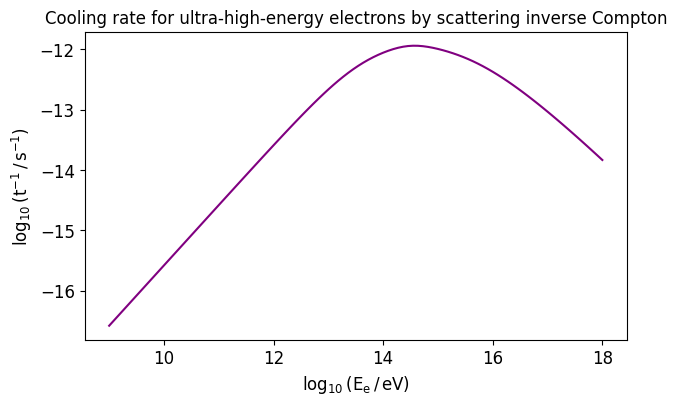

In [8]:
m = mass('electron')
c = lightVelocity
kb = boltzmannConstant

T = 2.725
Emin = 1e9 *ev2erg
Emax = 1e18 *ev2erg
EGrid = 100
arrE = np.logspace(np.log10(Emin), np.log10(Emax), EGrid)
Eph = 2.7*kb*T

arrTcomp = comptonCoolingTime(gasTemperature=T, lorentzFactor=arrE/m/c/c, particle='electron')

plt.figure(figsize=(7,4))
plt.plot(np.log10(arrE*erg2ev), -np.log10(arrTcomp),c='purple', label='Compton')
plt.xlabel(r"$\log_{10} ({\rm E_{e}\,/\,eV})$", fontsize=12)
plt.ylabel(r"$\log_{10} ({\rm t^{-1}\,/\,s^{-1}})$", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Cooling rate for ultra-high-energy electrons by scattering inverse Compton", fontsize=12)
plt.show()

The cooling rate decreases significantly at high energies. This regimen is known as the Klein-Nishina regimen.

### Inverse Compton spectral energy distribution

The spectrum of photons scattered by an electron of energy $E = \gamma m c^2$ interacting with an isotropic radiation field of energy distribution $n_{\rm ph}(\epsilon)$ is:

$$P_{\rm IC}(E_{\gamma},E,\epsilon) = \frac{3}{4}\frac{c \sigma_{\rm T}}{\gamma^2}\frac{n_{\rm ph}(\epsilon)}{\epsilon}F_{\rm IC}(E_{\gamma},E,\epsilon),$$

where $E_{\gamma}$ is the energy of the outgoing photon and $F_{\rm IC}$ is a dimensionless function given by:

$$F_{\rm IC}(q) = 2q \ln{q} + (1 + 2q)(1 - q) + \frac{1}{2}(1 - q)\frac{(q\Gamma)^2}{1 + q\Gamma},$$

where: 
$$\Gamma = \frac{4\epsilon \gamma}{mc^2}$$

and

$$q = \frac{E_{\gamma}}{\Gamma E (1 - E_{\gamma}/E)}$$  


From kinematic considerations, the range of energies allowed for the scattered photon is:

$$\epsilon \leq E_{\gamma} \leq \frac{4 E \kappa}{1 + 4\kappa},$$

where $\kappa = \epsilon E /m^2 c^4$. From the value that $\kappa$ takes, the interaction regime in this radiative process can be distinguished:

- $\kappa << 1$: Thomson regimen. The particles lose a small fraction of their energy in each interaction.
- $\kappa >> 1$: Klein-Nishina regime. Particles lose almost all of their energy in an interaction.




For an isotropic distribution of white photons, the total luminosity by inverse Compton scattering is given by:

$$L_{\rm IC}(E_{\gamma}) = E_{\gamma}^2 \int {\rm d}V \int_{E_{\rm min}}^{E_{\rm max}} {\rm d}E N(E) \int_{\epsilon_{\rm min}}^{\epsilon_{\rm max}}{\rm d}\epsilon P_{\rm IC}(E_{\gamma}, E, \epsilon)$$

For a monochromatic blackbody radiation field:

$$U_{\rm BB}(T) = U_{\rm \epsilon}(\epsilon,T)\,\delta(\epsilon\, - \left<\epsilon\right>) = n_{\rm \epsilon}(\epsilon,T)\epsilon$$

where:

$$n_{\rm \epsilon}(\epsilon,T) = \frac{U_{\rm \epsilon}(\epsilon,T)}{\epsilon}\,\delta(\epsilon\, - \left<\epsilon \right>)$$

The average energy of the radiation field is

$$\left< \epsilon \right> = \frac{\int_{0}^{\infty} {\rm d}\epsilon\, \epsilon\, n_{\epsilon}} {\int_{0}^{\infty} {\rm d}\epsilon\,n_{\epsilon}} = 2.7\,\kappa_{\rm B}T$$

In this case the power of a single interaction does not depend on the energy of the target photon:

$$P_{\rm IC}(E_{\gamma},E,\epsilon) = P_{\rm IC}(E_{\gamma},E)$$

$$P_{\rm IC}(E_{\gamma}, E) = \frac{3\sigma_{\rm T}m^2 c^5}{4E^2}\frac{U_{\rm ph}}{\left<\epsilon\right>^2}F_{\rm IC}(E_{\gamma}, E)$$

Finally, the inverse Compton luminosity becomes:

$$L_{\rm IC}(E_{\gamma}) = \frac{3\sigma_{\rm T}c U_{\rm ph}m^2 c^4 E_{\gamma}}{4\left< \epsilon \right>^2} \int {\rm d}V \int_{E_{\rm min}}^{E_{\rm max}}{\rm d}E\,\frac{N(E)}{E^2}F_{\rm IC}(E_{\gamma},E)\qquad [{\rm erg\,s^{-1}\,erg^{-1}}$$

This equation is numerically much more manageable than its general expression.

**Example 4**: Consider a source where there are relativistic electrons with energies between $E_{\rm min}=1\,{\rm MeV}$ and $E_{\rm max}=1\,{\rm TeV}$ distributed in energy as $N(E) = N_{0}E^{-p} \exp{(-E/E_{\rm max})}$ (in units of ${\rm erg^{-1}\,cm^{-3}}$) with spectral index $p = 2$. The total energy in non-thermal particles is $E_{\rm NT} = 10^{40}\,{\rm erg}$. In the same region there is a gas at temperature $T = 10^{4}\,{\rm K}$ that emits photons isotropically, which interact with the relativistic electrons. Plot the  emission spectrum from this source by inverse Compton scattering. Consider the simplest case where the emitter is homogeneous and stationary, and the radiation field is produced by a gray body (blackbody emitting monochromatic radiation). The radius of the source is $r = 5\,{\rm pc}$.

In [9]:
# Input parameters

Emin = 1e6 *ev2erg
Emax = 1e12 *ev2erg
EGrid = 1000
particle = 'electron'
p = 2
Et = 1e40
T = 1e4
r = 5*pc2cm

The parameter $N_0$ is calculated from the constraint of the total energy in non-thermal particles:

$$E_{\rm NT} = \int{\rm d}V \int_{E_{\rm min}}^{E_{\rm max}}{\rm d}E E\,N(E)$$

In a one-zone model:

$$N_0 = \frac{E_{\rm NT}}{V\int_{E_{\rm min}}^{E_{\rm max}}{\rm d}E\,E^{-p + 1}}$$

In [10]:
# Array of particle energies

arrE = np.logspace(np.log10(Emin), np.log10(Emax), EGrid)

In [11]:
# Calculating the distribution of relativistic electrons

volume = 4*pi*r*r*r/3

integral = simps(arrE**(-p+1) *np.exp(-arrE/Emax),arrE)
N0 = Et/integral/volume
arrN = N0*arrE**(-p)*np.exp(-arrE/Emax)

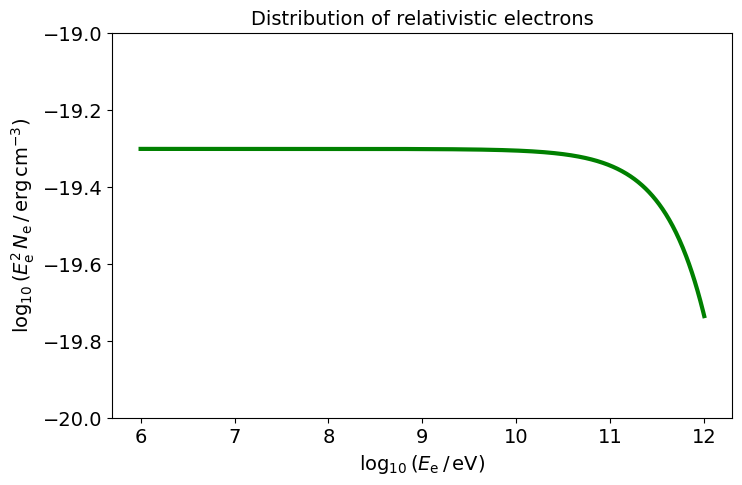

In [12]:
# Plotting the distribution

plt.figure(figsize=(8,5))
plt.plot(np.log10(arrE*erg2ev), np.log10(arrE*arrE*arrN), lw=3, c="green")
plt.xlabel(r"$\log_{10} (E_{\rm e}\,/\,{\rm eV})$", fontsize=14)
plt.ylabel(r"$\log_{10} (E_{\rm e}^{2}\,N_{\rm e}\,/\,{\rm erg\,cm^{-3}})$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-20,-19)
plt.title("Distribution of relativistic electrons", fontsize=14)
plt.show()

The exponential cut-off softens the spectrum significantly at high energies.

In [13]:
# Auxiliary function that returns limits of intervals in which we divide the range of integration

def getSubArrays(arr:np.ndarray, 
                 tol=1e-6):    
    #---------------------------------------------------------------------
    # Getting the sub arrays
    # array 1: [Emin : 10Emin]
    # array 2: [10Emin : 100Emin]
    # ...
    # array N = [10^(N-1) Emin : 10^N Emin]
    # if 10^N Emin < Emax then one more array is added 
    #   interval N+1 = [10^N Emin : Emax]        
    #---------------------------------------------------------------------        
    xmin = arr[0]
    xmax = arr[-1]
    nArrays = int(np.log10(xmax/xmin))
    key = abs(xmax - xmin*10**nArrays) < tol*xmax 
    if not key:
        nArrays += 1
    #---------------------------------------------------------------------            
    # Setting the arrays of minimum and maximum energy
    # K sub arrays (K = N or K = N+1)
    # arrEmin = [Emin, 10Emin, 100Emin, ..., 10^(K-1)Emin]
    # arrEmax = [Emax, 10Emax, 100Emax, ..., min(10^K Emin, Emax)]
    #---------------------------------------------------------------------
    arrMin = np.ones(nArrays) 
    arrMax = np.ones(nArrays)
    for i in range(nArrays):
        arrMin[i] = xmin*10**(i)
        arrMax[i] = xmin*10**(i+1)    
    if not key:            
        arrMax[-1] = xmax
    return arrMin, arrMax 

In [14]:
# Function that returns the probability of the photon scattering by inverse Compton

def fIC(particle:str,
        particleEnergy:float,
        targetPhotonEnergy:float,
        scatteredPhotonEnergy:float)->float:
    
    if scatteredPhotonEnergy < targetPhotonEnergy:
        return 0
    m = mass(particle)
    c = lightVelocity
    Gamma = 4*targetPhotonEnergy*particleEnergy/m/m/c/c/c/c
    if scatteredPhotonEnergy > Gamma*particleEnergy/(1 + Gamma):
        return 0
    else:
        q = scatteredPhotonEnergy/Gamma/particleEnergy/(1 - scatteredPhotonEnergy/particleEnergy)        
        return 2*q*log(q) + (1+2*q)*(1-q) + 0.5*(1-q)*(q*Gamma)**2 /(1+Gamma*q)

In [15]:
# Gauss-Legendre quadrature method for the integration

nIC = 100    

def getNodesGL(points:int):
    return np.polynomial.legendre.leggauss(points) 

# Function that returns the inverse Compton emissivity

def inverseComptonEmissivity(
    gasTemperature:float,    
    arrEnergy:np.array,
    arrDistribution:np.array,
    scatteredPhotonEnergy:float,
    particle:str='electron')->float:
    
    kb = boltzmannConstant
    Eph = 2.7*boltzmannConstant*gasTemperature
    Eg = scatteredPhotonEnergy
    f_IC = np.empty_like(arrEnergy)    
    for i in range(len(f_IC)):
        f_IC[i] = fIC(particle, arrEnergy[i], Eph, Eg)
    arrEmin, arrEmax = getSubArrays(arrEnergy)
    partialEmissivity = np.empty_like(arrEmin)        
    arrXgl, arrWgl = getNodesGL(nIC)
    
    for i in range(len(partialEmissivity)):
        arrE = 0.5*(arrEmax[i]-arrEmin[i])*arrXgl + 0.5*\
          (arrEmax[i]+arrEmin[i])              
        arrN = np.interp(arrE,arrEnergy,arrDistribution)
        f_IC_ = np.interp(arrE,arrEnergy,f_IC)
        partialEmissivity[i] = 0.5*(arrEmax[i]-arrEmin[i])*\
            sum(arrN*f_IC_*arrWgl/arrE/arrE)
    sigmaT = thomsonCrossSection(particle)
    m = mass(particle)
    c = lightVelocity
    uph = blackBody(gasTemperature)[2]
    emissivity = partialEmissivity.sum()
    
    return emissivity*3*sigmaT*(c**5)*uph*m*m*Eg/16/pi/Eph/Eph

In [16]:
# Array of energies of outgoing photons

Ephmin = 2.7*boltzmannConstant*T
EphGrid = 100
arrEph = np.logspace(log10(Ephmin),log10(arrE[0]),EphGrid)
arrEph = np.concatenate((arrEph,arrE[1:]),axis=None)

# Spectral emissivity

arrJ_IC = np.zeros_like(arrEph)
for i in range(len(arrEph)):
    arrJ_IC[i] = inverseComptonEmissivity(gasTemperature=T, 
                                          arrEnergy=arrE, 
                                          arrDistribution=arrN, 
                                          scatteredPhotonEnergy=arrEph[i], 
                                          particle='electron')

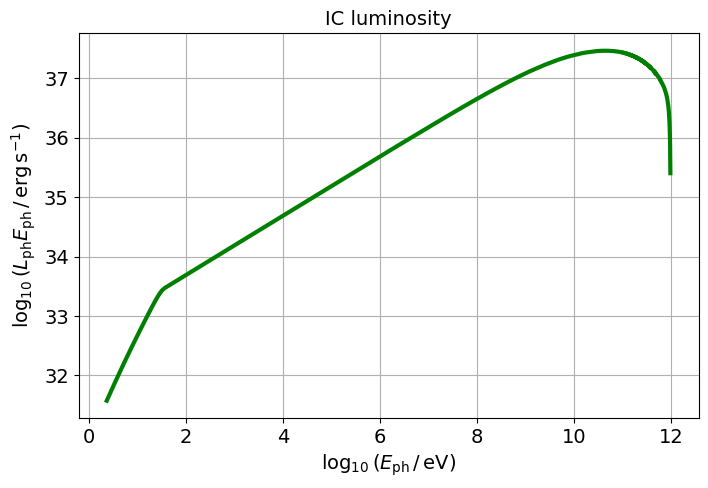

In [17]:
# Plotting the SED by inverse Compton scattering

plt.figure(figsize=(8,5))
plt.plot(np.log10(arrEph*erg2ev), np.log10(4*pi*arrEph*arrJ_IC*volume), ls = "-", lw=3, c='green', label='')
plt.xlabel(r"$\log_{10} (E_{\rm ph}\,/\,{\rm eV})$", fontsize=14)
plt.ylabel(r"$\log_{10} (L_{\rm ph}E_{\rm ph}\,/\,{\rm erg\,s^{-1}})$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("IC luminosity", fontsize=14)
plt.grid()
plt.show()

We see that there is a range of photon energies where the slope is linear on the logarithmic graph. The slope is related to the spectral index as: 

$$\delta = \frac{p-1}{2}$$

Same as expected for a synchrotron spectrum. This is so because for almost all electron energies the interactions are in the Thomson regime:

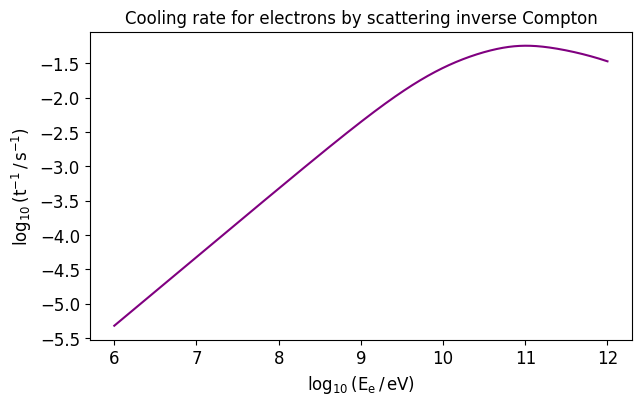

In [18]:
m = mass('electron')
c = lightVelocity
kb = boltzmannConstant

arrTcomp = comptonCoolingTime(gasTemperature=T, lorentzFactor=arrE/m/c/c, particle='electron')

plt.figure(figsize=(7,4))
plt.plot(np.log10(arrE*erg2ev), -np.log10(arrTcomp),c='purple', label='Compton')
plt.xlabel(r"$\log_{10} ({\rm E_{e}\,/\,eV})$", fontsize=12)
plt.ylabel(r"$\log_{10} ({\rm t^{-1}\,/\,s^{-1}})$", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Cooling rate for electrons by scattering inverse Compton", fontsize=12)
plt.show()

We numerically calculate the slope in the inverse Compton spectrum and verify that the value is the expected one

In [19]:
# First degree interpolating polynomial that fits the spectrum for the energies of interest

mask = (np.log10(arrEph*erg2ev) > 2) & (np.log10(arrEph*erg2ev) < 9)
z = np.polyfit(np.log10(arrEph[mask]*erg2ev), np.log10(4*pi*arrEph[mask]*arrJ_IC[mask]*volume), 1)

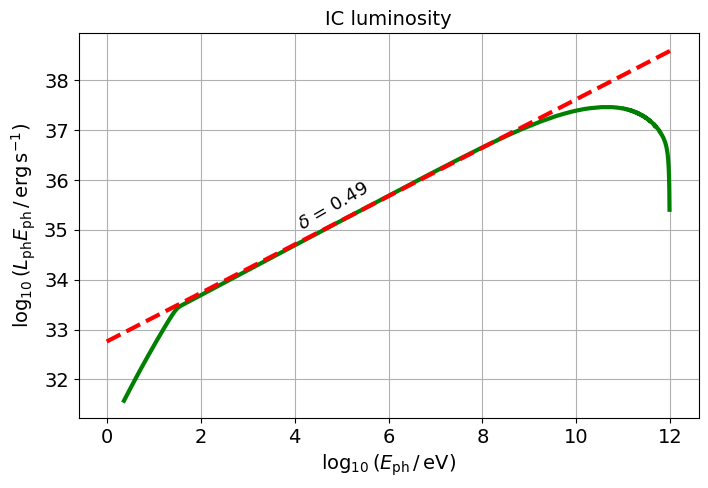

In [20]:
# Inverse Compton Spectrum and Fit Line

x = np.linspace(0,12,100)
y = z[1] + z[0]*x
plt.figure(figsize=(8,5))
plt.plot(np.log10(arrEph*erg2ev), np.log10(4*pi*arrEph*arrJ_IC*volume), ls = "-", lw=3, c='green', label='')
plt.plot(x, y, ls="--", lw = 3, c="red")
plt.annotate(f"$\delta$ = {z[0]:0.2}", (4, 35), rotation=30, fontsize=13)
plt.xlabel(r"$\log_{10} (E_{\rm ph}\,/\,{\rm eV})$", fontsize=14)
plt.ylabel(r"$\log_{10} (L_{\rm ph}E_{\rm ph}\,/\,{\rm erg\,s^{-1}})$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("IC luminosity", fontsize=14)
plt.grid()
plt.show()

The slope is consistent with the expected value for a spectral index $p=2$ and cooling in the Thomson regime. The departure from the theoretical value of $\delta = 0.5$ is mainly because of the exponential cut-off in $N(E)$.